In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#The dataset contains no header for columns, hence the header parameter
abnormal=pd.read_csv('./ptbdb_abnormal.csv',header=None)
normal=pd.read_csv('./ptbdb_normal.csv',header=None)

In [3]:
data = pd.concat([abnormal, normal]).sample(frac=1).reset_index(drop=True)

In [4]:
Y=data[data.columns[-1:]]
X=data[data.columns[:-2]]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(x_train.shape)

(10914, 186)


In [6]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,186,1])

In [7]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,186,1])

In [8]:
model=tf.keras.Sequential([
    layers.Conv1D(7, 7, activation='relu', input_shape=(186,1)),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(5,5,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(3,3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid') #softmax cuz categories
])

In [9]:
model.compile('adam',tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy']) #this was with validation
history=model.fit(x_train,y_train,batch_size=128,epochs=200,verbose=True,validation_split=0.2)

Epoch 1/200
69/69 [==============================] - 4s 30ms/step - loss: 0.5108 - accuracy: 0.7440 - val_loss: 0.6249 - val_accuracy: 0.7132
Epoch 2/200
69/69 [==============================] - 2s 23ms/step - loss: 0.3514 - accuracy: 0.8523 - val_loss: 0.5249 - val_accuracy: 0.7128
Epoch 3/200
69/69 [==============================] - 2s 23ms/step - loss: 0.2387 - accuracy: 0.9065 - val_loss: 0.5068 - val_accuracy: 0.7151
Epoch 4/200
69/69 [==============================] - 2s 22ms/step - loss: 0.1904 - accuracy: 0.9264 - val_loss: 0.3906 - val_accuracy: 0.8007
Epoch 5/200
69/69 [==============================] - 1s 20ms/step - loss: 0.1597 - accuracy: 0.9392 - val_loss: 0.3585 - val_accuracy: 0.8301
Epoch 6/200
69/69 [==============================] - 1s 21ms/step - loss: 0.1379 - accuracy: 0.9480 - val_loss: 0.2610 - val_accuracy: 0.8841
Epoch 7/200
69/69 [==============================] - 1s 20ms/step - loss: 0.1197 - accuracy: 0.9553 - val_loss: 0.2780 - val_accuracy: 0.8763
Epoch 

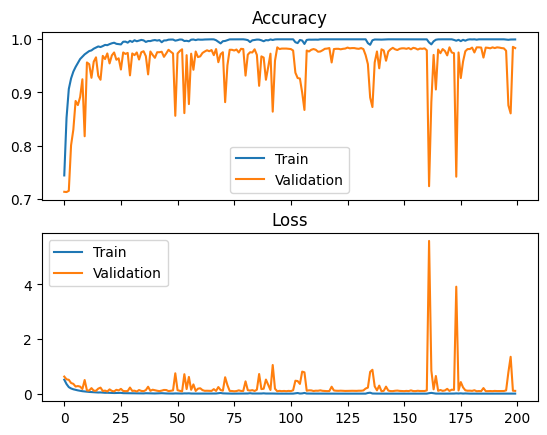

In [10]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [11]:
model.evaluate(x_test, y_test, verbose=True)

114/114 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9857


[0.07774823158979416, 0.9857064485549927]

In [13]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

114/114 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1018
         1.0       0.99      0.99      0.99      2620

    accuracy                           0.99      3638
   macro avg       0.98      0.98      0.98      3638
weighted avg       0.99      0.99      0.99      3638

